In [1]:
import numpy as np 
import pandas as pd

In [2]:
#例18.1

In [3]:
X_Etruscan=np.array([141,148,132,138,154,142,150,146,155,158,
                     150,140,147,148,144,150,149,145,149,158,
                     143,141,144,144,126,140,144,142,141,140,
                     145,135,147,146,141,136,140,146,142,137,
                     148,154,137,139,143,140,131,143,141,149,
                     148,135,148,152,143,144,141,143,147,146,
                     150,132,142,142,143,153,149,146,149,138,
                     142,149,142,137,134,144,146,147,140,142,
                     140,137,152,145])
#统计数据的最小值与最大值
X_min,X_max=min(X_Etruscan),max(X_Etruscan)
X_min,X_max

(126, 158)

In [4]:
#生成从124.5到159.5(包含)距离相等的8个数，作为区间端点
bins=np.linspace(X_min-1.5,X_max+1.5,8)
bins

array([124.5, 129.5, 134.5, 139.5, 144.5, 149.5, 154.5, 159.5])

In [5]:
#以bins为区间端点，统计落在每个区间的数据频数
uniform_divide=pd.cut(X_Etruscan,bins,include_lowest=True).value_counts()
uniform_divide

(124.499, 129.5]     1
(129.5, 134.5]       4
(134.5, 139.5]      10
(139.5, 144.5]      33
(144.5, 149.5]      24
(149.5, 154.5]       9
(154.5, 159.5]       3
dtype: int64

In [6]:
#计算频率
freq=uniform_divide.values  #每组频数
frequency=freq/sum(freq)  #频数/总个数
frequency=np.round(frequency,5)  #保留5位小数
frequency

array([0.0119 , 0.04762, 0.11905, 0.39286, 0.28571, 0.10714, 0.03571])

In [7]:
#计算累积频率
cumfreq=np.cumsum(frequency)  #cumsum求累积和
cumfreq=np.round(cumfreq,4)  #保留4位小数
cumfreq

array([0.0119, 0.0595, 0.1786, 0.5714, 0.8571, 0.9643, 1.    ])

In [8]:
#绘制频数分布表
df=pd.DataFrame()
df['Freq']=freq  #频数
df['Frequency']=np.round(frequency,4)  #频率
df['CumFreq']=cumfreq  #累积频率
#以组限作为索引
df.index=uniform_divide.index
df

,Freq,Frequency,CumFreq
"(124.499, 129.5]",1,0.0119,0.0119
"(129.5, 134.5]",4,0.0476,0.0595
"(134.5, 139.5]",10,0.1190,0.1786
"(139.5, 144.5]",33,0.3929,0.5714
"(144.5, 149.5]",24,0.2857,0.8571
"(149.5, 154.5]",9,0.1071,0.9643
"(154.5, 159.5]",3,0.0357,1.0000


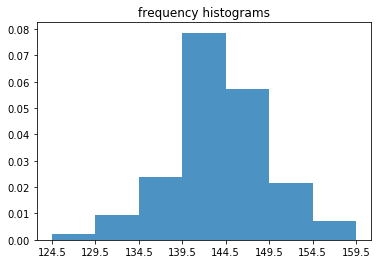

In [9]:
#绘制频率直方图
import matplotlib.pyplot as plt
#hist绘制直方图，bins为区间端点，density=True矩形面积表示频率，alpha设置透明度
plt.hist(X_Etruscan,bins=bins,density=True,alpha=0.8)
plt.title('frequency histograms')
#以区间端点作为x轴刻度
plt.xticks(bins)  
plt.show()

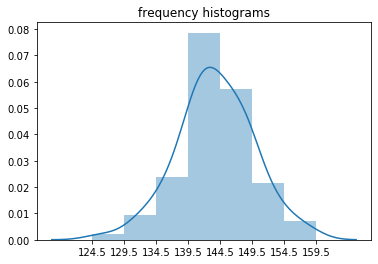

In [10]:
import seaborn as sns
#distplot绘制直方图以及核密度估计曲线
sns.distplot(X_Etruscan,bins=bins)
plt.title('frequency histograms')
plt.xticks(bins)
plt.show()

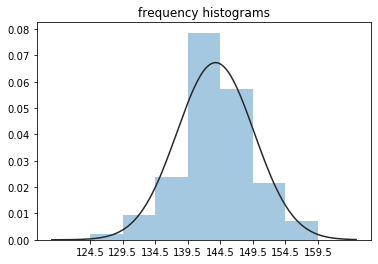

In [11]:
from scipy.stats import norm
#kde=False关闭核密度估计，fit=norm拟合正态分布相应的概率密度曲线
sns.distplot(X_Etruscan,bins=bins,kde=False,fit=norm)
plt.title('frequency histograms')
plt.xticks(bins)
plt.show()

In [12]:
#例18.2

In [13]:
X=np.array([122,126,133,140,145,145,149,150,157,
            162,166,175,177,177,183,188,199,212])
np.percentile(X,q=[20,25,50])

array([142. , 145. , 159.5])

In [14]:
#将数据转为DataFrame形式，用quantile求分位数
dfX=pd.DataFrame()
dfX['X']=np.array([122,126,133,140,145,145,149,150,157,
                   162,166,175,177,177,183,188,199,212])
dfX.quantile(q=[0.2,0.25,0.5])  #分位数的表示形式与percentile不同

,X
0.20,142.0
0.25,145.0
0.50,159.5


In [15]:
#例18.3

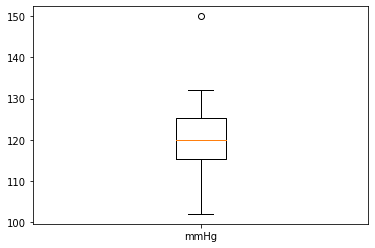

In [16]:
X_mmHg=[102,110,117,118,122,123,132,150]
#绘制箱线图
plt.boxplot(X_mmHg,labels=['mmHg'])
plt.show()

In [17]:
#例18.4

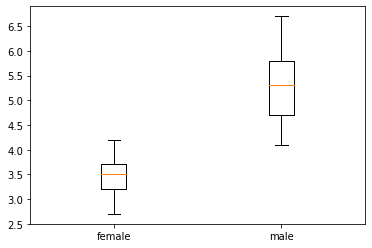

In [18]:
X_F=[2.7,2.8,2.9,3.1,3.1,3.1,3.2,3.4,3.4,
    3.4,3.4,3.4,3.5,3.5,3.5,3.6,3.7,3.7,
    3.7,3.8,3.8,4.0,4.1,4.2,4.2]
X_M=[4.1,4.1,4.3,4.3,4.5,4.6,4.7,4.8,4.8,
    5.1,5.3,5.3,5.3,5.4,5.4,5.5,5.6,5.7,
    5.8,5.8,6.0,6.1,6.3,6.7,6.7]
X=[X_F,X_M]
plt.boxplot(X,labels=['female','male'])
plt.show()